## Load model

In [387]:
# Code and CSV files from: https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community

# Read in the nodelist file
with open('quakers_nodelist.csv', 'r') as nodecsv:
    nodereader = csv.reader(nodecsv)
    nodes = [n for n in nodereader][1:]

# Get a list of just the node names (the first item in each row)
node_names = [n[0] for n in nodes]

# Read in the edgelist file
with open('quakers_edgelist.csv', 'r') as edgecsv:
    edgereader = csv.reader(edgecsv)
    edges = [tuple(e) for e in edgereader][1:]

# Print the number of nodes and edges in our two lists
print(len(node_names))
print(len(edges))

G = nx.Graph() # Initialize a Graph object
G.add_nodes_from(node_names) # Add nodes to the Graph
G.add_edges_from(edges) # Add edges to the Graph
print(nx.info(G)) # Print information about the Graph

119
174
Name: 
Type: Graph
Number of nodes: 119
Number of edges: 174
Average degree:   2.9244


## 1: Erdös-Renyi as a null model

In [388]:
# N choose K function
import math
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)

In [389]:

# Fetch number of nodes from original network
numberOfNodes = G.number_of_nodes()
expectedNumberOfEdges = G.number_of_edges()
print(expectedNumberOfEdges)


# Calculate p to get the right expected number of edges for  Erdös-Renyi model
p = expectedNumberOfEdges/(nCr(numberOfNodes,2))

# Create Erdös-Renyi model
erdos = nx.erdos_renyi_graph(numberOfNodes,p)
print(erdos.number_of_edges())

174
169


In [390]:
# Find communities of G using Clauset-Newman-Moore greedy modularity maximization
from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(G)


# Calculate max modularity for G 
import networkx.algorithms.community as nx_comm
maxModularity = nx_comm.modularity(G, communities)
print(maxModularity)

0.6021601268331347


In [391]:
# Calculate max modularity for Erdös-Renyi model over 100 simulations

# Fetch number of nodes from original network
numberOfNodes = G.number_of_nodes()
expectedNumberOfEdges = G.number_of_edges()

# Calculate p to get the right expected number of edges for Erdös-Renyi model
p = expectedNumberOfEdges/(nCr(numberOfNodes,2))

maxModularityList = []
for i in range(100):

    # Create Erdös-Renyi model using Clauset-Newman-Moore greedy modularity maximization
    erdos = nx.erdos_renyi_graph(numberOfNodes,p)

    # Find communities of Erdös-Renyi model
    communities = greedy_modularity_communities(erdos)

    # Calculate max modularity and add to maxModularityList
    maxModularityList.append(nx_comm.modularity(erdos, communities))


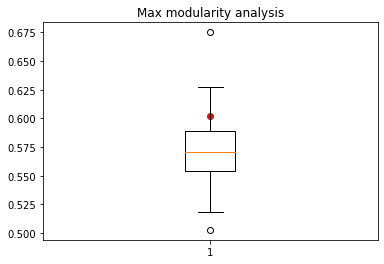

In [392]:
# Plot the result
figure, ax = plt.subplots()
ax.set_title('Max modularity analysis')
ax.plot(1,maxModularity, 'ro')
ax.boxplot(maxModularityList)
plt.show()


In [393]:
elementsLarger = [element for element in maxModularityList if element > maxModularity]
precentLargerThan = len(elementsLarger)/len(maxModularityList)
print(f'The max modularity for the real network is the {len(elementsLarger)+1} largest value when comparing to 100 simulations of the Erdös-Renyi model')
print(f'The real network had a larger max modularity than {(1-precentLargerThan)*100}% of the Erdös-Renyi models')

The max modularity for the real network is the 14 largest value when comparing to 100 simulations of the Erdös-Renyi model
The real network had a larger max modularity than 87.0% of the Erdös-Renyi models


## 2: Configuration Model as a null model

In [394]:
# Get the degree sequence of the network
degreeSequence = []
for n, d in G.degree():
    degreeSequence.append(d)


In [395]:
# Calculate max modularity for Configuration model over 100 simulations

maxModularityList = []
for i in range(100):

    # Create configuration model from the degree sequence
    configurationModel = nx.configuration_model(degreeSequence)

    # Go from MultiGraph to Graph (Remove parallel edges)
    configurationModel = nx.Graph(configurationModel)

    # Find communities of Configuration model
    communities = greedy_modularity_communities(configurationModel)

    # Calculate max modularity and add to maxModularityList
    maxModularityList.append(nx_comm.modularity(configurationModel, communities))



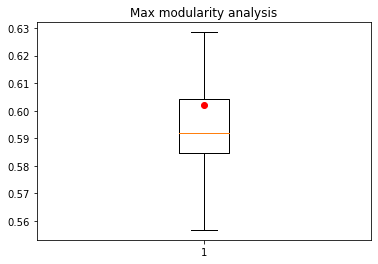

In [396]:
# Plot the result
figure, ax = plt.subplots()
ax.set_title('Max modularity analysis')
ax.plot(1,maxModularity, 'ro')
ax.boxplot(maxModularityList)
plt.show()

In [397]:
elementsLarger = [element for element in maxModularityList if element > maxModularity]
precentLargerThan = len(elementsLarger)/len(maxModularityList)
print(f'The max modularity for the real network is the {len(elementsLarger)+1} largest value when comparing to 100 simulations of the Configuration model')
print(f'The real network had a larger max modularity than {(1-precentLargerThan)*100}% of the Configuration models')

The max modularity for the real network is the 31 largest value when comparing to 100 simulations of the Configuration model
The real network had a larger max modularity than 70.0% of the Configuration models
